In [ ]:
# Pandas to import data and for some plots
import pandas as pd
# Numpy is for quick manipulations
import numpy as np
# matplotlib for Plotting Graphs
import matplotlib.pyplot as plt
# Sklearn is for build, train and test models
import sklearn
from sklearn.model_selection import train_test_split # easy an quick seperate data
from sklearn import datasets, linear_model
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression , RidgeClassifier # Classifiers for model training and testing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline # Pipelines are used to make automation in model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from pandas.plotting import scatter_matrix,boxplot
import seaborn # seaborn is for plotting graphs for better analysis
from seaborn import barplot, boxplot, catplot, displot, lineplot

In [ ]:
import sys
sys.setrecursionlimit(70000)

On Openml website there is data named mnist_784 which contains 70,000 images, there is 0 to 9 numbers in that images, images size is 28*28 pixel
importing that data from openml website in my notebook using sklearn fetch functon

In [ ]:
data = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
features = data['data']
labels = data['target']

In [ ]:
features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Analysis on data to find any important factor

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [ ]:
features.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
dummy = features
dummy['target'] = labels

In [ ]:
dummy

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
# dummy.hist(bins=40,figsize=(200,150))

When playing with complex and data which having more than 20 features never use histograph it will crash or stuck code

 lets create model and pipelines, there is one more thing i want to see the actual numbers

In [ ]:
features = features.to_numpy()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Selecting any random two images by slicingm, pixes size is 28 28 so need to reshape it to 28 28 also

In [ ]:
pic = features[3000]
pic1 = features[3005]
pic = pic.reshape(28,28)
pic1 = pic1.reshape(28,28)

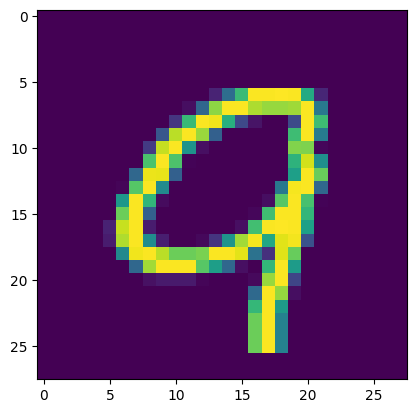

In [ ]:
plt.imshow(pic)

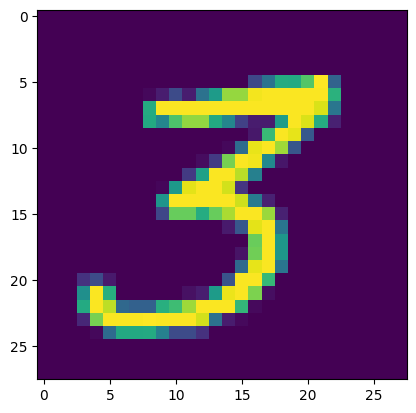

In [ ]:
plt.imshow(pic1)

We can manual seperate data in the for of 20 and 80 % but using sklearn train_test_split function its quick

In [ ]:
train_features,test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=43)

In [ ]:
train_features.shape

(56000, 784)

In [ ]:
train_labels.shape

(56000,)

In [ ]:
test_labels.shape

(14000,)

In [ ]:
test_features.shape

(14000, 784)

Creating Pipeline to apply some functions on features automaticaly when pass from it

In [ ]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Fitting the actual trainning data in to Pipeline

In [ ]:
pre_features = my_pipeline.fit_transform(train_features)

The data we have that is too much so wwe also have to increase iterations of the Model

In [ ]:
Model = LogisticRegression(max_iter=1000)

Now we are passing the testing features from the pipeline which pipeline has already been trained by our 56,000 features

In [ ]:
pre_test_features = my_pipeline.transform(test_features)

In [79]:
Model.fit(pre_features, train_labels)

LogisticRegression(max_iter=1000)

We are not going to pass all the testing features from model because if we do that our model will sometimes take that testing features and overfit features and it will be so bad for us so try to use few features from testing data first and then if model is working good then use all testing features

In [ ]:
pre_test_features[:1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00457315, -0.00595681, -0.00422581,
        -0.00422581,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00422581, -0.00644617, -0.00798143,
        -0.01098591, -0.01478939, -0.0192051 , -0.02279292, -0.02720617,
        -0.02847063, -0.03160339, -0.03369566, -0.0309124 , -0.02939023,
        -0.02695998, -0.02261848, -0.01813155, -0.01587037, -0.00957443,
        -0.00861707, -0.00453445,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.00558472,
        -0.00807234, -0.0114772 , -0.01924652, -0.02883745, -0.03753548,
        -0.05274831, -0.06702185, -0.08388919, -0.1

In [85]:
result = Model.predict(pre_test_features[:1])

In [ ]:
test_labels[:1]

10315    7
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
result

array(['7'], dtype=object)

In [64]:
test_labels[:1]

10315    7
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [66]:
new_labes_test = test_labels.astype(np.int8)

In [68]:
mean_squared_error(new_labes_test[:1], result)

0.0

At this stage Model is showing 100% accuracy we passed only one pixel from model which is number 7 and model predicted it number 7 so by that mean squared error showing model have 100% accuracy but what if we test model by passing all testing data now

In [69]:
Prediction1 = my_pipeline.transform(test_features)

In [74]:
new_pre_features = Model.predict(result)

In [76]:
mean_squared_error(new_labes_test, new_pre_features)

1.4035

I dont know what kind of accuracy it is

Lets use Another models and to find which fits perfect on our data

In [77]:
Model1 = RidgeClassifier()
Model2 = KNeighborsClassifier()
Model3 = MLPClassifier()
Model4 = RandomForestClassifier()

I think fine with 4 more models

In [80]:
Model1.fit(pre_features, train_labels)
Model2.fit(pre_features, train_labels)
Model3.fit(pre_features, train_labels)
Model4.fit(pre_features, train_labels)

RandomForestClassifier()

In [112]:
result1 = Model1.predict(pre_test_features[:1])
result2 = Model2.predict(pre_test_features[:1])
result3 = Model3.predict(pre_test_features[:1])
result4 = Model4.predict(pre_test_features[:1])

In [108]:
from numpy.ma.core import std
def accuracy(name, tru_y, pre_y):
  tru_y = np.asarray(tru_y, dtype=np.float64)
  pre_y = np.asarray(pre_y, dtype=np.float64)
  print(name)
  mse = mean_squared_error(tru_y, pre_y)
  print("The Accuracy of the model is " + str(mse))
  print(f"Standard Dev is " + str(std(mse)))

In [116]:
List = ([
    ("Logistic Regression : ",new_labes_test[:1], result),
    ("Ridge Classifier : ",new_labes_test[:1], result1),
    ("KNeighborsClassifier : ",new_labes_test[:1], result2),
    ("Neural Network Classifier : ",new_labes_test[:1], result3),
    ("Random Forest Classifier",new_labes_test[:1], result4)
])

In [117]:
for Name, tru_y, pre_y in List:
  accuracy(Name, tru_y, pre_y)

Logistic Regression : 
The Accuracy of the model is 0.0
Standard Dev is 0.0
Ridge Classifier : 
The Accuracy of the model is 0.0
Standard Dev is 0.0
KNeighborsClassifier : 
The Accuracy of the model is 0.0
Standard Dev is 0.0
Neural Network Classifier : 
The Accuracy of the model is 16.0
Standard Dev is 0.0
Random Forest Classifier
The Accuracy of the model is 0.0
Standard Dev is 0.0


In [118]:
result5 = Model.predict(pre_test_features)
result6 = Model1.predict(pre_test_features)
result7 = Model2.predict(pre_test_features)
result8 = Model3.predict(pre_test_features)
result9 = Model4.predict(pre_test_features)

In [119]:
List1 = ([
    ("Logistic Regression : ",new_labes_test, result5),
    ("Ridge Classifier : ",new_labes_test, result6),
    ("KNeighborsClassifier : ",new_labes_test, result7),
    ("Neural Network Classifier : ",new_labes_test, result8),
    ("Random Forest Classifier",new_labes_test, result9)
])

In [120]:
for Name, tru_y, pre_y in List1:
  accuracy(Name, tru_y, pre_y)

Logistic Regression : 
The Accuracy of the model is 1.4035
Standard Dev is 0.0
Ridge Classifier : 
The Accuracy of the model is 2.677
Standard Dev is 0.0
KNeighborsClassifier : 
The Accuracy of the model is 0.8637142857142858
Standard Dev is 0.0
Neural Network Classifier : 
The Accuracy of the model is 0.5315
Standard Dev is 0.0
Random Forest Classifier
The Accuracy of the model is 0.5770714285714286
Standard Dev is 0.0


In the end finaly Neural Newtwork won the race with 0.5 Error